<a href="https://colab.research.google.com/github/Souha-Kabtni/Sale_Prediction_PART3/blob/main/Souha_Kabtni_Project_1_Part_3_(Core)_Phase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

⛳ # The first project will be a sales prediction for food items sold at various stores.
# **The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.**

# **PART 1:**

In [53]:
# 1st: upload the file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 2nd: Import my to be used packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 3rd: Read the fil with pandas
df = pd.read_csv('/content/drive/MyDrive/Coding_Dojo/Week 2/Assingments/sales_predictions_2023.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# **PART 2:**

**0. For me to have a general idea of my dataframe**



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**1. How many rows and columns?**



In [ ]:
df.shape # 8523 rows and 12 columns

(8523, 12)

**2. What are the datatypes of each variable?**

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**3. Are there duplicates? If so, drop any duplicates.**


In [ ]:
df.duplicated().sum()
# Ths output of the .duplicated().sum() gave 0 ==> We have no duplicated rows to drop in the 1st place

0

**4. Identify missing values.**

In [ ]:
df.isna().sum()
# The output gave 2 columns with missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).**

In [ ]:
df[df['Item_Weight'].isna()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


Item_Weight contants 1463 missing data, out of (8523*12 = 102276) data values => This represents l,43% of the data => According to the rule of thumb of less then 2% missing values can be dropped, I will drop this column.

In [ ]:
df.drop(columns=['Item_Weight'], inplace=True)
df.isna().sum()
# Item_Weight column is now permanently dropped

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Size contains 2410 missing values, out of (8523*12 = 102276) data values => This represents 2,35% of the data => This exceeds the rule of thumn of 2% => I will not drop this column.

Outlet_Size is of type Object => I will fill data with a new category "Missing"

* I did not opt for fill this categorical data with the most common value in the column since the highest value only represents 32,77% of all values, and is not a value that is overwhelmingly more common than the other values in the same column.

In [ ]:
df['Outlet_Size'].fillna('Missing', inplace=True)

**6. Confirm that there are no missing values after addressing them.**

In [ ]:
df.isna().sum()
# As per the .isna().sum() diplayed above, all values are cleared from (null) values.

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)**



In [ ]:
# Locate my Object columns
df_types = df.dtypes
df_types

Item_Identifier               object
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
# Extraxr my Object columns
str_cols = df_types[df_types=="O"]
str_cols

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [ ]:
# find the index of each
str_cols.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
df[str_cols.index].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Missing,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
str_cols = str_cols.index

In [ ]:
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
for col in str_cols:
  print(f"{col}:")
  print(df[col].value_counts(dropna=False))
  print("\n\n")


Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT01

Found that Item_Fat_Content column contains both

1. 'Low Fat' and 'LF', which seems to be the same, yet written differently YET read as different values by the program
2. 'Regula' and 'reg', which seems to be the same, yet written differently YET read as different values by the program

=> Replacinng both Low Fat and 'LF' by 'Low_Fat' and 'reg' by 'Regular'


In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF',"Low Fat")
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat',"Low Fat")
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg',"Regular")
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**8. For any numerical columns, obtain the summary statistics of each (min, max, mean)**

In [ ]:
# Get the summary of my data
df_summary = df.describe()
df_summary

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
# Extraxt the min from the min dataframe, df_summary
display(min)
df_summary.loc['min', :].round()

<function min>

Item_Visibility                 0.0
Item_MRP                       31.0
Outlet_Establishment_Year    1985.0
Item_Outlet_Sales              33.0
Name: min, dtype: float64

In [ ]:
# Extraxt the max from the max dataframe, df_summary
display(max)
df_summary.loc['max', :].round()

<function max>

Item_Visibility                  0.0
Item_MRP                       267.0
Outlet_Establishment_Year     2009.0
Item_Outlet_Sales            13087.0
Name: max, dtype: float64

In [ ]:
# Extraxt the min from the mean dataframe, df_summary
print('Mean')
df_summary.loc['mean', :].round()

Mean


Item_Visibility                 0.0
Item_MRP                      141.0
Outlet_Establishment_Year    1998.0
Item_Outlet_Sales            2181.0
Name: mean, dtype: float64

# **PART 3**

The goal of this is to help you understand the data as it relates to **the  products and outlets that play crucial roles in increasing sales.**

For Part3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 732.6+ KB


# 1. Ranking through Bar Chart

# **❎ Justifying my decision of using a horizontal barchart for 'Item_Type': I judge this feature ('Item_Type') to be important in my future predictions of the role it plays in increasing sales.**

In [ ]:
# Item_Type: The category to which the product belongs
# horizontal Barchart possibility
# Can be put in a Multivariate with Item_Fat_Content

_Item_types_ = df['Item_Type'].value_counts(ascending=True)
_Item_types_

Seafood                    64
Breakfast                 110
Starchy Foods             148
Others                    169
Hard Drinks               214
Breads                    251
Meat                      425
Soft Drinks               445
Health and Hygiene        520
Baking Goods              648
Canned                    649
Dairy                     682
Frozen Foods              856
Household                 910
Snack Foods              1200
Fruits and Vegetables    1232
Name: Item_Type, dtype: int64

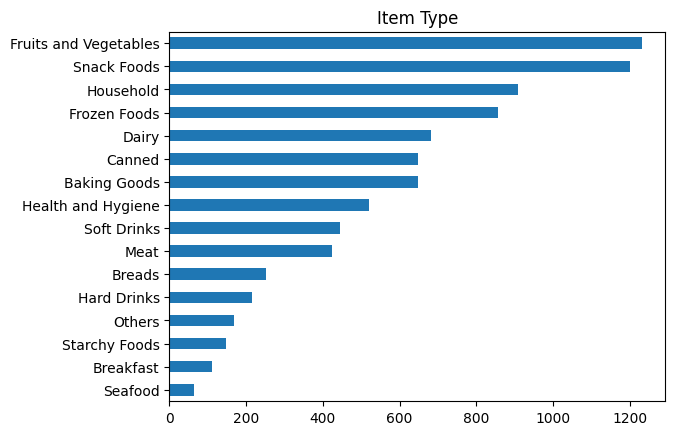

In [ ]:
_Item_types_.plot(kind = 'barh')
plt.title('Item Type')
plt.show();

# **✅ Interpretation: The top three item types sold in the stores are: Fruits and vegetables, Snack foods and Household, whereas Starchy food, Breakfast and Seafood are the least sold items.**

# 2. Studying the Distribution through Treemap

# **❎ Justifying my decision of using a Treemap for 'Outlet_Type': I judge this feature ('Outlet_Type') to be important in my future predictions of the role it plays in increasing sales.**

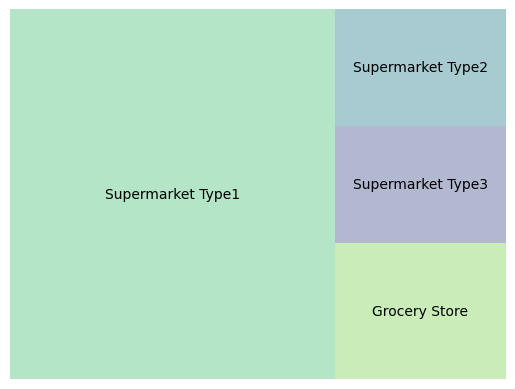

In [56]:
!pip install squarify
import squarify

df_treemap = df['Outlet_Type'].value_counts();

squarify.plot(sizes=df_treemap, label=['Supermarket Type1', 'Grocery Store', 'Supermarket Type3', 'Supermarket Type2'], alpha=.4);
plt.axis('off')
plt.show();

# **✅ Interpretation: Supermarket Type 1 is the most frequent Outlet-type that is in our dataset.**

# 3. Correlation - Chart Type: Heatmap

# **❎ Justifying my decision of using a Heatmap: I judge that the best way to visualize correlation between the features of my dataframe is by using a heatmap.**

In [ ]:
# Heatmap

correlation = df.corr()
correlation

In [ ]:
sns.heatmap(df.corr(),cmap='Blues', annot=True);

# ✅ Interpretation: I will focus my attention on Item_Outlet_Sales and link the other 3 elements to it as I interpret the results, since it is the ultimate target variable to be predicted. the As per the heatmap results:

# **+ With a positive correlation of 0.57, Item_MRP and Item_Outlet_Sales moderately correlate.**
# **+ With a negative correlation of -0.13 and -0.049 between Item_Visibility and Outlet_Establishment_Year respectively with Item_Outlet_Sales.**

# **==> Conclusion: The more the product is high in price, the more it is sold.**

# 4. Studying the Distribution through Histograms

# ❎ Justifying my decision of using a histogram for 'Item_Outlet_Sales': I judge this feature ('Item_Outlet_Sales') to be important since it is the target variable to be predicted.

In [ ]:
mean_sales = df['Item_Outlet_Sales'].mean()
mean_sales

2181.288913575032

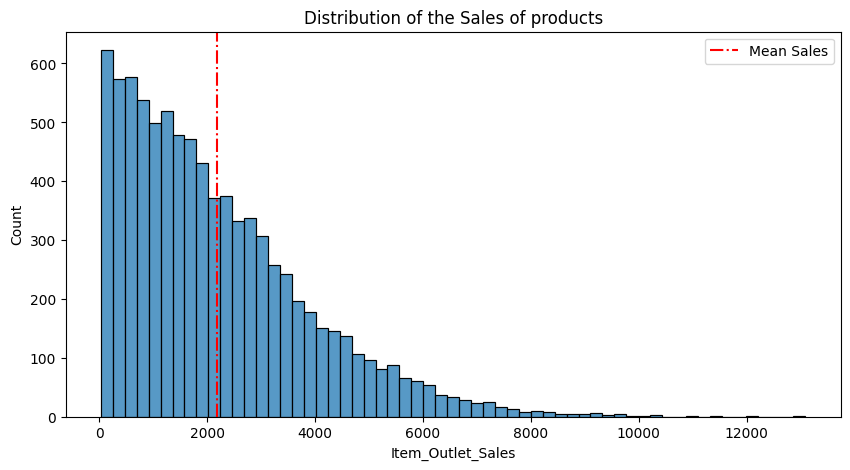

In [ ]:
fig, ax = plt.subplots(figsize=(10,5));
sns.histplot(data=df, x='Item_Outlet_Sales', ax=ax)
ax.set(title='Distribution of the Sales of products');
mean_price = df['Item_Outlet_Sales'].mean()
ax.axvline(mean_sales,color='red', ls='dashdot',
           label= "Mean Sales");
ax.legend();


#✅ **The distribution of the Sales of products is right skewed to indicate that there is "a limit on the minimum possible value but no limit on the maximum possible value".**